# 1.7.Tabela de Distribuição de Frequência


Creation: July 2021.

Last modification on September 03 2022.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em uma grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [1]:
import numpy as np
import pandas as pd
from math import sqrt,ceil
from statistics import mean, median, mode, pstdev
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
style.use('seaborn')

## Variável quantitativa contínua

Definir o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados fictício sobre as notas obtidas de uma turma de 41 estudantes da disciplina de matemática no ano de 2020.

In [4]:
values = [
    10, 8, 8.5, 7, 5.5, 5.2, 6.7, 2.5, 10, 9.3, 9.2, 8.7, 7.4, 2.5, 1, 0, 0, 7.5, 8, 9, 2, 1, 7.8, 
    8.8, 10, 10, 9.5, 6.5, 5.5, 5, 7.2, 5, 5.2, 3, 2, 2.5, 4.8, 10, 10, 9.5, 9.8
]

Antes da construção da tabela de distribuição de frequência, ainda com os dados brutos, podemos obter algumas informações sobre o conjunto de dados.

Tornar em ordem crescente o conjunto de dados brutos.

In [5]:
values.sort()

Obter a média, a mediana e a moda dos dados.

__Média:__ é uma medida que busca resumir, considerando todos os valores do conjunto de dados, em um valor central.

__Mediana:__ é a medida que divide o conjunto de dados __exatamente__ ao meio (em conjuntos de tamanho par é a média do dois valores centrais), por esse motivo que devemos tornar o conjunto de dados em ordem crescente.

__Moda:__ é o valor que mais se repete no conjunto de dados, pode não haver nenhum e poder haver multiplos valore modais.

O uso de uma (ou mais) medidas de tendência depende da _sensibilidade estatística_ do pesquisador, a partir do que cada uma representa e da necessidade.

In [6]:
# Mean
mean_value = np.around(mean(values),2)
print('Média: {}'.format(mean_value))

# Median
median_value = np.around(median(values),2)
print('Mediana: {}'.format(median_value))

# Mode
mode_value = np.around(mode(values),2)
print('Moda: {}'.format(mode_value))

Média: 6.37
Mediana: 7.2
Moda: 10


Neste situação, vemos que média das notas obtidas pelos 41 estudantes é de 6.37, a nota que divide o conjunto de dados ao meio é 7.2 e a nota mais frequente no conjunto de dados é 10.

Com esses dados podemos criar um gráfico _Boxplot_

Text(1.1, 7.2, '7.2')

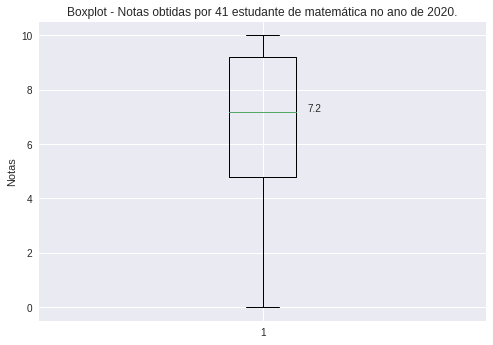

In [7]:
plt.boxplot(values)
plt.title('Boxplot - Notas obtidas por 41 estudante de matemática no ano de 2020.')
plt.ylabel('Notas')
plt.text(1.1, median_value, str(median_value))

Podemos observar que não há _outliers_ no conjunto de dados. Além disso, vemos 3 quartis (ou 75%) dos dados estão acima da nota 5 (aproximadamente).

Para construção da tabela de distribuição de frequência precisamos compreender a nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis. A variável do exemplo dado, sobre a notas de 41 estudantes da disciplina de matemática, é classificada como quantitativa contínua, onde o número real vária de 0 a 10, inclusive o 10.

Após a classificação do tipo da variável, podemos entender melhor como ocorrerá a construção da tabela de distribuição de frequência. Primeiramente, precisamos obter o número de classes e a amplitude de cada classe. Nesta tabela todas a classes terão amplitude iguais, porém a situações em que podem ser encontradas ou pode haver necessidade de ter em uma mesma tabela classes com amplitudes diferentes.

In [8]:
number_of_elements = np.size(values)
number_of_classes =  ceil(sqrt(number_of_elements))
total_amplitude = max(values) - min(values)
class_breadth = np.around(((max(values) - min(values)) / number_of_classes),2)

Criar uma lista com o limite inferior de cada classe.

In [9]:
inferior_limits = []
for value in range(0,number_of_classes):
    element = min(values) + (class_breadth * value)
    inferior_limits.insert(value, np.around(element,2))

Criar uma lista com o limite superior de cada classe.

In [11]:
upper_limits = []
for value in inferior_limits:
    upper_limit = np.around(value + class_breadth, 2)
    upper_limits.append(upper_limit)

Criar um multi index com os limites inferiores e os limites superiores.

In [13]:
classes = [inferior_limits, upper_limits]
classes = pd.MultiIndex.from_arrays(classes, names=['Limite inferior', 'Limite superior'])

Criar uma lista com a frequência absoluta de cada classe.

In [14]:
#fi: absolute frequency
fi = []
fi_counter = 0
for value in range(0,number_of_classes):
    frequency = 0
    for value_02 in values:
        if fi_counter < number_of_classes - 1:    
            if value_02 >= inferior_limits[fi_counter] and value_02 < inferior_limits[fi_counter + 1]:
                frequency +=1
        if fi_counter == number_of_classes - 1:
            if value_02 >= inferior_limits[fi_counter]:
                frequency += 1
    fi.insert(fi_counter,frequency)
    fi_counter +=1

Criar uma lista com a frequência relativa de cada classe. Essa lista é criada a partir da lista de frequência absoluta.

In [15]:
#fi_relative: relative frequency
fi_relative = []
for value in range(0, number_of_classes):
    element = fi[value] / number_of_elements
    fi_relative.append(np.around(element, 5))

Converter o valor de cada valor da lista de frequência relativa para a forma por cento (%).

In [16]:
#_100fi_relative: relative (in %) frequency
_100fi_relative = list(map(lambda value: np.around(value * 100, 2), fi_relative))

Função _cumulate_: dado uma lista de valores, retorna uma lista com os seus valores acumulados, por exemplo, list_accumulated[0] = values[0]; list_accumulated[1] = values[0] + values[1]; e assim sucessivamente.

In [17]:
def cumulate(values):
    list_accumulated = [values[0]]
    for counter in range(1, len(values)):
        element = list_accumulated[counter - 1] + values[counter]
        element = np.around(element, 2)
        list_accumulated.append(element)
    
    return list_accumulated 

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [18]:
#fi: cumulative absolute frequency
fi_accumulated = cumulate(fi)

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [19]:
#_100fi_relative: cumulative relative (in %) frequency
_100fi_relative_accumulated = cumulate(_100fi_relative)

Criar uma lista com o ponto médio de cada classe.

O ponto médio é utilizado somente quando a variável é quantitativa e a sua finalidade é representar a classe na qual está associada.

In [20]:
midpoint_lambda = lambda value: np.around((inferior_limits[value] + upper_limits[value]) / 2, 2)
midpoint = list(map(midpoint_lambda, range(0,7)))

Contruir o DataFrame.

In [21]:
data_names = ['Fi', 'Fi (%)', 'Fi Acumulado', 'Fi (%) Acumulado', 'Ponto médio']
data_values = [fi, _100fi_relative, fi_accumulated, _100fi_relative_accumulated, midpoint]
data = {}
for value in range(0, len(data_names)):
    data[data_names[value]] = data_values[value]


In [22]:
frequency_distribution = pd.DataFrame(index=classes, data=data)

In [23]:
frequency_distribution

,,Fi,Fi (%),Fi Acumulado,Fi (%) Acumulado,Ponto médio
Limite inferior,Limite superior,,,,,
0.00,1.43,4,9.76,4,9.76,0.72
1.43,2.86,5,12.20,9,21.96,2.14
2.86,4.29,1,2.44,10,24.40,3.58
4.29,5.72,7,17.07,17,41.47,5.00
5.72,7.15,3,7.32,20,48.79,6.44
7.15,8.58,7,17.07,27,65.86,7.86
8.58,10.01,14,34.15,41,100.01,9.30


_Plots_ com algumas informações da tabela.

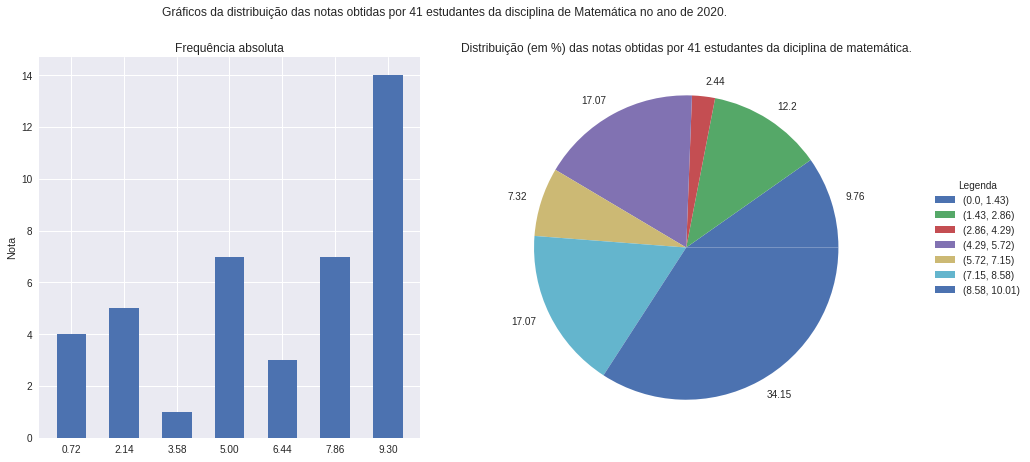

In [32]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Gráficos da distribuição das notas obtidas por 41 estudantes da disciplina de Matemática no ano de 2020.')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].bar(frequency_distribution['Ponto médio'], frequency_distribution['Fi'])
plots[0].set_title('Frequência absoluta')
plots[0].set_ylabel('Nota')
plots[0].set_xticks(midpoint)

plots[1].pie(x=frequency_distribution['Fi (%)'], labels=_100fi_relative)
plots[1].set_title('Distribuição (em %) das notas obtidas por 41 estudantes da diciplina de matemática.')
plots[1].legend(bbox_to_anchor=(0.9,0.2,0.5,0.5), title='Legenda', labels=classes)

In [25]:
frequency_distribution[:]['Fi'].iloc[6]

14

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.